In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src.mlp import MLP
from src.dataset import ProteinDataset

In [ ]:
total_len = 0
min_len = 100000
max_len = 0
len_list = []
for seq in dataset.protein_seqs:
    len_list.append(len(seq['seq']))
    total_len += len(seq['seq'])
    min_len = min(min_len, len(seq['seq']))
    max_len = max(max_len, len(seq['seq']))
    
print(total_len/len(dataset.protein_seqs))
print(min_len)
print(max_len)

plt.hist(len_list, bins=10)

In [32]:
protein_seqs = ProteinDataset.load_data('assignment1_data')
print(len(protein_seqs))

3000


In [52]:
epochs, batch_size, learning_rate, hidden, split_len = 100, 32, 1e-4, 32, 5
save_file = f"./model_dict/mlp_{batch_size}_{learning_rate}_{epochs}_{hidden}_{split_len}.pth"

mlp = MLP(epochs=epochs, batch_size=batch_size, learning_rate=learning_rate, hidden=hidden, split_len=split_len)
mlp.load_data(protein_seqs)
mlp.train(True)
mlp.save_res(save_file)
q3s = mlp.valid(True)

Starting epoch 1


/run/media/zcy/Windows-SSD/Users/zcy/Documents/Academic/ICT/crouses/bio-ml/homework1/networks/mlp.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.loss_df = self.loss_df._append(


Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
Starting epoch 57


/run/media/zcy/Windows-SSD/Users/zcy/Documents/Academic/ICT/crouses/bio-ml/homework1/networks/mlp.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.loss_df = self.loss_df._append(


True_len: 223
Pred_len: 225
True: CHHHHHHCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHCHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHCCCCCCCCCHHHHHHHHHHHHHHHHHCCCCCCCCCCCCC
Pred: HHHHHEECCCCCCCCCEEEEHHCCCHHHHHHHHCCCHHHHHCHHHHHHHHHHHCCEEEEEHHHHHHHHHHHHHHHCHHHHEHHHCHHHHHCCCCCHEEEEHCCCCHHHHHHHHHHCHHCCHHHHHHHHHHHHHHHHHHHHHHCCCCCCCHHHHHHCEEEECHHHHCCCCCHHHHHHHHHHHHCCCCCCCHCCCCCHHHHHHHHHHCHHHHHCCCCHHHHHCCCCC
Q3: 0.672645739910314
True_len: 92
Pred_len: 95
True: CCCCCCEEEEEEEEEEEECCCCEEEEEEEEEECCEEEEEEECCCCCEEECCHHHHHHHHHHHCCHHHHHHHHCHHHHHHHHHHHHHHHHCCC
Pred: CCCCCHHHHHCCHCEEECCCHHHHHHHCCCEECCCHHHHHCCCCCHHHEEHHCCCCCCCHHCCCCHHHHHHHHHHCHHHHCCCCCCCCCECCCCE
Q3: 0.42391304347826086
True_len: 145
Pred_len: 145
True: CHHHHHHCCHHHCCCCHHHHHHHHHCCEEEEECCCCEEECCCCCCCCEEEEEECCEEEEEECCCCCEEEEEEECCCCEECCHHHHCCCCCCCEEEECCCEEEEEECHHHHHHHHHHCHHHHHHHHHHHHHHHHHHHHHHHHHHHC
Pred: CHHHHHHHCCHHHCCCCCHEHHHHHCCHHHCCCCCHHHHHCCCCCCEEEEE

600
58.646624855648234
0.4976730162853328


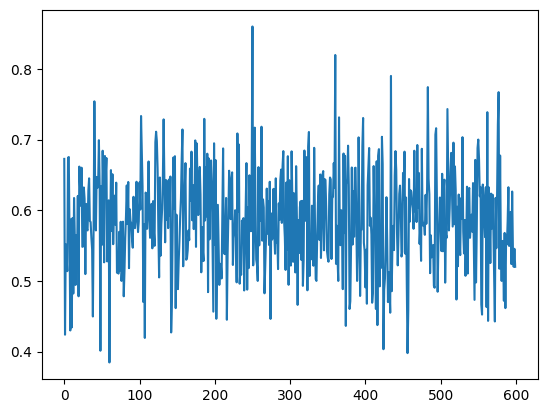

In [55]:
from sklearn.metrics import mean_squared_error
print(len(q3s))
print(100 * sum(q3s)/len(q3s))
mse = mean_squared_error(q3s, [sum(q3s)/len(q3s)] * len(q3s))
print(100 * mse)

plt.plot(q3s)

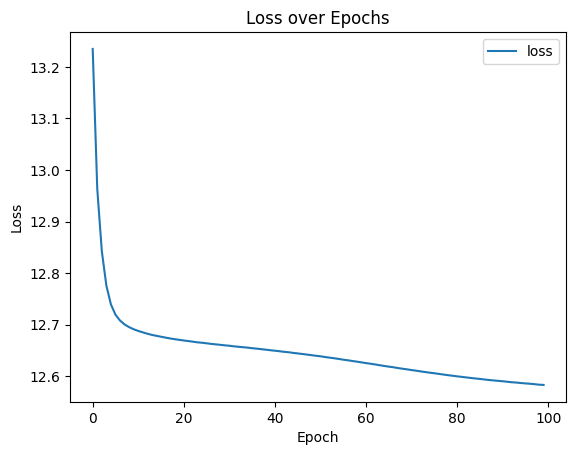

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
df = pd.read_csv(f'{save_file}_loss.csv')
df.plot(x='epoch', y='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


In [ ]:
epochs = [500, 800]
batch_size = [32, 50, 64, 100]
learning_rate_list = [0.5e-4, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4]
hidden = [32, 64, 128, 256]

for e in epochs:
    for b in batch_size:
        for l in learning_rate_list:
            for h in hidden:
                save_file = f"./model_dict/mlp_{e}_{b}_{l}_{h}.pth"
                mlp = MLP(epochs=e, batch_size=b, learning_rate=l, hidden1=h, hidden2=h)
                mlp.load_data(dataset)
                mlp.train()
                c = mlp.valid()
                print(f"Accuracy of the network mlp_{e}_{b}_{l}_{h}.pth: {c}%")
                if c > 50:
                    mlp.save_res(save_file)
                